# Manifold learning:  non-linear dimension reduction

Sources:

- [Scikit-learn documentation](http://scikit-learn.org/stable/modules/manifold.html)

- [Wikipedia](https://en.wikipedia.org/wiki/Isomap)

Nonlinear dimensionality reduction or **manifold learning**  cover unsupervised methods that attempt to identify low-dimensional manifolds within the original $P$-dimensional space that represent high data density. Then those methods provide a mapping from the high-dimensional space to the low-dimensional embedding.


## Multi-dimensional Scaling (MDS)

Resources:

- http://www.stat.pitt.edu/sungkyu/course/2221Fall13/lec8_mds_combined.pdf
- https://en.wikipedia.org/wiki/Multidimensional_scaling
- Hastie, Tibshirani and Friedman (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction.* New York: Springer, Second Edition.

The purpose of MDS is to find a low-dimensional projection of the data in which the pairwise distances between data points is preserved, as closely as possible (in a least-squares sense).

- Let $\mathbf{D}$ be the $(N \times N)$ pairwise distance matrix where $d_{ij}$ is *a distance* between points $i$ and $j$.
- The MDS concept can be extended to a wide variety of data types specified in terms of a similarity matrix.

Given the dissimilarity (distance) matrix $\mathbf{D}_{N \times N}=[d_{ij}]$, MDS attempts to find  $K$-dimensional projections of the $N$ points $\mathbf{x}_1, \ldots, \mathbf{x}_N \in \mathbb{R}^K$, concatenated in an $\mathbf{X}_{N \times K}$ matrix, so that $d_{ij} \approx \|\mathbf{x}_i - \mathbf{x}_j\|$ are as close as possible. This can be obtained by the minimization of a loss function called the **stress function**

$$
\mathrm{stress}(\mathbf{X}) = \sum_{i \neq j}\left(d_{ij} -  \|\mathbf{x}_i - \mathbf{x}_j\|\right)^2.
$$

This loss function is known as *least-squares* or *Kruskal-Shepard* scaling.

A modification of *least-squares* scaling is the *Sammon mapping*

$$
\mathrm{stress}_{\mathrm{Sammon}}(\mathbf{X}) = \sum_{i \neq j} \frac{(d_{ij} -  \|\mathbf{x}_i - \mathbf{x}_j\|)^2}{d_{ij}}.
$$

The Sammon mapping performs better at preserving small distances compared to the *least-squares* scaling.

### Classical multidimensional scaling

Also known as *principal coordinates analysis*, PCoA.

- The distance matrix, $\mathbf{D}$, is transformed to a *similarity matrix*, $\mathbf{B}$, often using centered inner products.

- The loss function becomes

$$
\mathrm{stress}_{\mathrm{classical}}(\mathbf{X}) = \sum_{i \neq j} \big(b_{ij} -  \langle\mathbf{x}_i, \mathbf{x}_j\rangle\big)^2.
$$

- The stress function in classical MDS is sometimes called *strain*.

- The solution for the classical MDS problems can be found from the eigenvectors of the similarity matrix.

- If the distances in $\mathbf{D}$ are Euclidean and double centered inner products are used, the results are equivalent to PCA.

### Example

The ``eurodist`` datset provides the road distances (in kilometers) between 21 cities in Europe.
Given this matrix of pairwise (non-Euclidean) distances $\mathbf{D}=[d_{ij}]$, MDS can be used to recover the coordinates of the cities in *some* Euclidean referential whose orientation is arbitrary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pairwise distance between European cities
try:
    url = '../datasets/eurodist.csv'
    df = pd.read_csv(url)
except:
    url = 'https://github.com/duchesnay/pystatsml/raw/master/datasets/eurodist.csv'
    df = pd.read_csv(url)

print(df.iloc[:5, :5])

city = df["city"]
D = np.array(df.iloc[:, 1:])  # Distance matrix

# Arbitrary choice of K=2 components
from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000, eps=1e-9)
X = mds.fit_transform(D)

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


Recover coordinates of the cities in Euclidean referential whose orientation is arbitrary:

In [2]:
from sklearn import metrics
Deuclidean = metrics.pairwise.pairwise_distances(X, metric='euclidean')
print(np.round(Deuclidean[:5, :5]))

[[   0. 3116. 2994. 3181. 3428.]
 [3116.    0. 1317. 1289. 1128.]
 [2994. 1317.    0.  198.  538.]
 [3181. 1289.  198.    0.  358.]
 [3428. 1128.  538.  358.    0.]]


Plot the results:

(np.float64(-1894.091917806915),
 np.float64(2914.3554370871243),
 np.float64(-1712.973369719749),
 np.float64(2145.4370687880146))

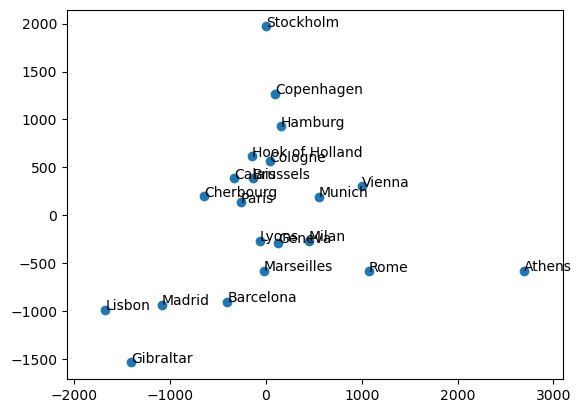

In [3]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]])
Xr = np.dot(X, rot)
# flip x
Xr[:, 0] *= -1
plt.scatter(Xr[:, 0], Xr[:, 1])

for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
plt.axis('equal')

### Determining the number of components

We must choose $K^* \in \{1, \ldots,  K\}$ the number of required components. Plotting the values of the stress function, obtained using $k \leq N-1$ components. In general, start with $1, \ldots K \leq 4$. Choose $K^*$ where you can clearly distinguish an *elbow* in the stress curve.

Thus, in the plot below, we choose to retain information accounted for by the first *two* components, since this is where the *elbow* is in the stress curve.

[np.float64(48644495.28571428), np.float64(3356497.365752386), np.float64(2858455.495887962), np.float64(2756310.6376280114)]


Text(0, 0.5, 'stress')

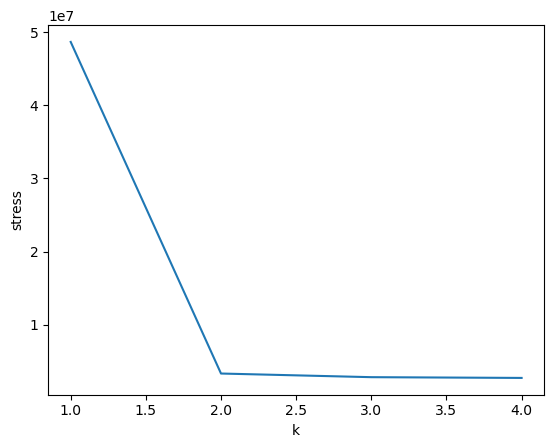

In [4]:
k_range = range(1, min(5, D.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k,
           random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in k_range]

print(stress)
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")

### Exercises

Apply MDS from `sklearn` on the `iris` dataset available at: 

https://github.com/duchesnay/pystatsml/raw/master/datasets/iris.csv

- Center and scale the dataset.

- Compute Euclidean pairwise distances matrix.

- Select the number of components.

- Show that classical MDS on Euclidean pairwise distances matrix is equivalent to PCA.

Manifold learning

Dataset S curve:

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

X, color = datasets.make_s_curve(1000, random_state=42)

## Isomap 

Isomap is a nonlinear dimensionality reduction method that combines a procedure to compute the distance matrix with MDS. The distances calculation is based on geodesic distances evaluated on neighborhood graph:

1. Determine the neighbors of each point. All points in some fixed radius or K nearest neighbors.

2. Construct a neighborhood graph. Each point is connected to other if it is a K nearest neighbor. Edge length equal to Euclidean distance.

3. Compute shortest path between pairwise of points $d_{ij}$ to build the distance matrix $\mathbf{D}$. 

4. Apply MDS on  $\mathbf{D}$.

In [6]:
isomap = manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

## t-SNE 

Sources:

- [Wikipedia](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- [scikit-learn](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)

Principles

1. Construct a (Gaussian) probability distribution between pairs of object in input (high-dimensional) space.
2. Construct a (student) ) probability distribution between pairs of object in embeded (low-dimensional) space.
3. Minimize the Kullback–Leibler divergence (KL divergence) between the two distributions.

Features

- Isomap, LLE and variants are best suited to unfold a single continuous low dimensional manifold
- t-SNE will focus on the **local structure** of the data and will tend to extract clustered **local groups** of samples

In [7]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

(np.float64(-68.37603721618652),
 np.float64(64.30499229431152),
 np.float64(-14.287820672988891),
 np.float64(17.26294598579407))

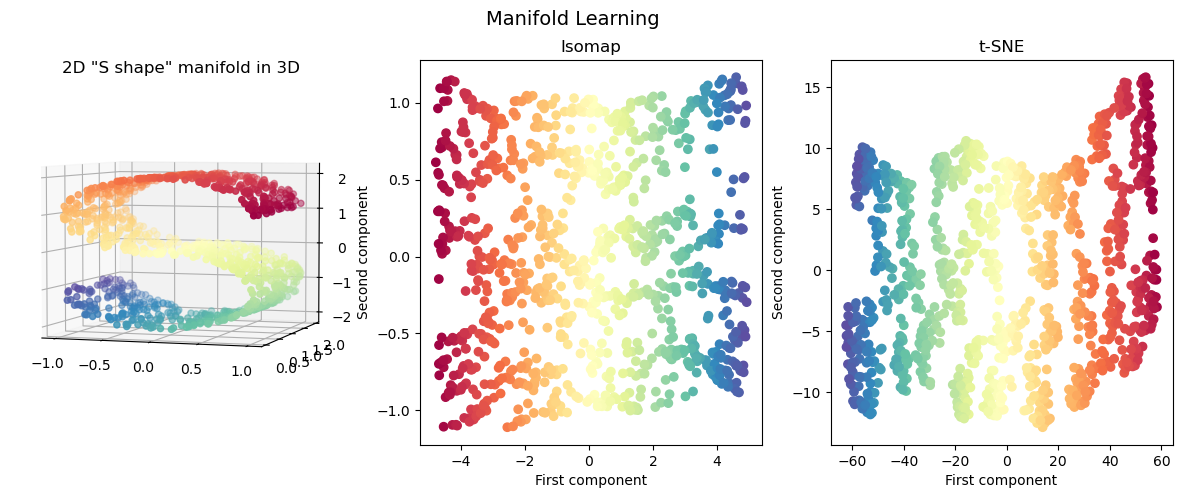

In [8]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle("Manifold Learning", fontsize=14)

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.title('2D "S shape" manifold in 3D')

ax = fig.add_subplot(132)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap")
plt.xlabel("First component")
plt.ylabel("Second component")

ax = fig.add_subplot(133)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('tight')

## Exercises

Run [Manifold learning on handwritten digits: Locally Linear Embedding, Isomap with scikit-learn](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html)